In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

C:\Users\pelle\AppData\Local\Temp\ipykernel_14172\4164245003.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the data
import pickle
with open('../Data/cleanedDF.pkl', 'rb') as file:
    data = pickle.load(file)

df = data.copy()

print(df.head())

   Patient_ID  Age  Blood_Pressure  CVD_Risk_Score  Gender_Male  \
0           1   55             104              78            1   
1           2   66             142              49            0   
2           3   69             176              31            0   
3           4   45             178              23            0   
4           5   39             146              79            0   

   Smoking_Status_Smoker  Cholesterol_Level_Low  Cholesterol_Level_Normal  \
0                      0                      0                         1   
1                      1                      1                         0   
2                      1                      1                         0   
3                      1                      0                         1   
4                      1                      0                         1   

   Air_Pollution_Exposure_Low  Air_Pollution_Exposure_Medium  ...  \
0                           0                              0  ...

In [4]:
# Preparaing the data
X = df.drop('Heart_Attack_Yes', axis=1)
y = df['Heart_Attack_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
# Random Forrest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)



# Evaluating models
rf_predictions = rf_classifier.predict(X_test)
print("Accuracy of Random Forrest: ", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

dt_predictions = dt_classifier.predict(X_test)
print("Accuracy of Decision Tree: ", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

nb_predictions = nb_classifier.predict(X_test)
print("Accuracy of Naive Bayes: ", accuracy_score(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))






Accuracy of Random Forrest:  0.8784636603000794
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     42038
           1       0.00      0.00      0.00      5816

    accuracy                           0.88     47854
   macro avg       0.44      0.50      0.47     47854
weighted avg       0.77      0.88      0.82     47854

Accuracy of Decision Tree:  0.7649517281731935
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86     42038
           1       0.12      0.15      0.13      5816

    accuracy                           0.76     47854
   macro avg       0.50      0.50      0.50     47854
weighted avg       0.79      0.76      0.78     47854

Accuracy of Naive Bayes:  0.8784636603000794
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     42038
           1       0.00  

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: Unde

In [6]:
# Now lets check which of the features are the most important for the Random Forrest Classifier
rf_feature_importances = rf_classifier.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
print(feature_importance_df)


Feature Importances (Random Forest):
                            Feature  Importance
0                        Patient_ID    0.113505
3                    CVD_Risk_Score    0.099701
2                    Blood_Pressure    0.099033
1                               Age    0.094600
4                       Gender_Male    0.018678
44                      TCM_Use_Yes    0.018124
5             Smoking_Status_Smoker    0.017628
18             Rural_or_Urban_Urban    0.017224
42          Alcohol_Consumption_Yes    0.016323
30        Hospital_Availability_Low    0.016140
31     Hospital_Availability_Medium    0.016013
9     Air_Pollution_Exposure_Medium    0.015975
43           Family_History_CVD_Yes    0.015758
12              Diet_Score_Moderate    0.015721
39                 Hypertension_Yes    0.015692
14                 Stress_Level_Low    0.015441
10            Physical_Activity_Low    0.015389
7          Cholesterol_Level_Normal    0.015301
13                  Diet_Score_Poor    0.015187
15

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 301),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=30,  # how many combos to try
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train, y_train)
best_rf_classifier = random_search.best_estimator_

print("Best hyperparameters for Random Forest:")
print(random_search.best_params_)
print("Best score: ", random_search.best_score_)
print("Best estimator: ", best_rf_classifier)



Fitting 3 folds for each of 30 candidates, totalling 90 fits


Best hyperparameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 288}
Best score:  0.8785081395105845
Best estimator:  RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=9,
                       n_estimators=288, random_state=42)


Accuracy of Random Forrest with hyperparameters:  0.8784636603000794
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     42038
           1       0.00      0.00      0.00      5816

    accuracy                           0.88     47854
   macro avg       0.44      0.50      0.47     47854
weighted avg       0.77      0.88      0.82     47854



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


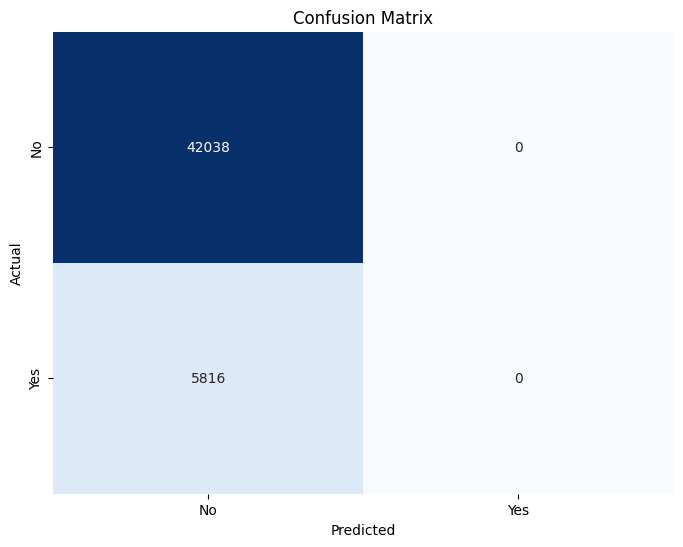

In [ ]:
# Lets use the hyperparameters to train the model again
best_rf_classifier.fit(X_train, y_train)
rf_predictions = best_rf_classifier.predict(X_test)
print("Accuracy of Random Forrest with hyperparameters: ", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
# Confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# After the grid search we can see that the accuracy has improved a bit, but its still not great.
# We can tell from the confusion matrix that the model is not very good at predicting the positive class, which is when a heart attack occurs.


In [10]:
# Exporting the models
import pickle

# Lets save the models and their accuracies


rf = {
    'RandomForest': rf_classifier,
    'RandomForestAccuracy': accuracy_score(y_test, rf_predictions),
    'RandomForestReport': classification_report(y_test, rf_predictions),
}
dc = {
    'DecisionTree': dt_classifier,
    'DecisionTreeAccuracy': accuracy_score(y_test, dt_predictions),
    'DecisionTreeReport': classification_report(y_test, dt_predictions),
}

nb = {
    'NaiveBayes': nb_classifier,
    'NaiveBayesAccuracy': accuracy_score(y_test, nb_predictions),
    'NaiveBayesReport': classification_report(y_test, nb_predictions),
}



with open('../Data/models/rfModel.pkl', 'wb') as file:
    pickle.dump(rf, file)

with open('../Data/models/DTmodels.pkl', 'ab') as file:
    pickle.dump(dc, file)
    
with open('../Data/models/nbModel.pkl', 'wb') as file:
    pickle.dump(nb, file)

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: Unde

## What can we tell from all of this?

### Choice of models

We are working with a classification problem: If the person have a heart attack or not. We therefore have selected the three models from previous success in the Business Intelligence course:
1. Decision Tree
2. Random Forest 
3. Naive Bayes.

From our experience its always a good thing to include a standard Decision tree.
We also includes Random Forest, which is a "Forest" of decision trees trained on different parts of the training data, which in terms makes it more precise.
Naive bayes have been performing well in earlier projects with relatively low performance hits.


### Selection of the best fit model

Based on the evaluation metrics—particularly accuracy, F1 score, and recall—we can see that Random Forest achieved the highest overall accuracy at ~87.8%, the same as Naive Bayes, and higher than Decision Tree (~76.5%).

However, accuracy alone is not a reliable metric in our case due to class imbalance (i.e., far more non-heart attack cases than heart attack cases). This is evident because all models show significantly worse performance on class 1 (heart attack), with very low recall and F1 scores.

Random Forest: Predicts the majority class (0) very well but completely misses class 1 (recall = 0.00), resulting in an F1 score of 0.00 for that class.

Naive Bayes: Also achieves high accuracy, but like Random Forest, it struggles to identify class 1.

Decision Tree: Slightly lower accuracy overall, but does slightly better at identifying class 1 (F1 = 0.13), showing a better balance between both classes, albeit still far from ideal.




While Random Forest shows the best accuracy and is typically a strong model, its inability to identify the minority class (heart attack cases) is a critical issue in this context, especially given the potential consequences of missing a heart attack prediction.

Therefore, despite the lower accuracy, the Decision Tree shows slightly better sensitivity to class 1. However, none of the models currently perform well enough to be considered "good" at detecting heart attacks, and further work (e.g., resampling, better feature engineering, or using specialized models for imbalanced data) is necessary.

### Explanation of what overfitting means and how we can spot it


Overfitting happens when a model learns the training data too well, including noise and outliers, making it perform poorly on unseen data. It essentially "memorizes" rather than "generalizes".

We can spot overfitting when:
The model performs very well on training data but poorly on test data.
There is a large gap between training and test accuracy.
The model consistently predicts the majority class in an imbalanced dataset (as we see with Random Forest predicting mostly class 0).

In our case, models like Random Forest showed perfect recall for class 0 but zero recall for class 1, indicating possible overfitting to the majority class.

### Explain what hyperparameters you have adjusted and why

We performed hyperparameter tuning on the Random Forest classifier to optimize its performance. The following were adjusted:

- n_estimators: Number of trees in the forest. More trees generally increase performance but also training time. (Tested: 100, 200, 300)
- max_depth: Controls how deep each tree can grow. Limiting this helps prevent overfitting. (Tested: None, 10, 20, 30)
- min_samples_split: Minimum number of samples needed to split an internal node. Helps reduce model complexity. (Tested: 2, 5, 10)
- min_samples_leaf: Minimum number of samples needed at a leaf node. A higher value helps in smoothing the model. (Tested: 1, 2, 4)

These parameters were chosen to balance between model complexity and generalization, using GridSearchCV to find the best combination.
However we did not get a better result from changing these parameters, the accuracy for predicting non-heart attacks went up by ~1 %.


### Explain how you have measured quality using F1 score and explain the terms accuracy, precision and recall (sensitivity).

To evaluate our models, we used several key metrics:

- **Accuracy**: The percentage of total predictions the model got right.  
  Formula: `Accuracy = (True Positives + True Negatives) / Total Predictions`

- **Precision**: Out of all positive predictions, how many were actually positive.  
  Formula: `Precision = True Positives / (True Positives + False Positives)`

- **Recall (Sensitivity)**: Out of all actual positives, how many did we correctly identify.  
  Formula: `Recall = True Positives / (True Positives + False Negatives)`

- **F1 Score**: Harmonic mean of precision and recall. It balances both and is especially useful when dealing with imbalanced classes.  
  Formula: `F1 Score = 2 * (Precision * Recall) / (Precision + Recall)`

Since our dataset is imbalanced (fewer heart attack cases), the **F1 score** is more informative than accuracy. A model can have high accuracy by predicting only the majority class, but that’s misleading. The F1 score shows how well the model identifies both classes, especially the minority class (heart attacks).
